activation='sigmoid', 'relu', 'softmax'  

Square Error: loss='mse'  
Cross Entropy: loss='categorical_crossentropy'  

optimizer=SGD(), Adam()  

In [1]:
from loadMNIST import *

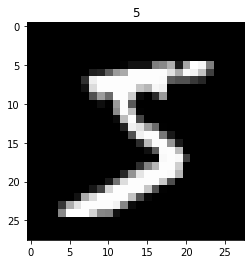

In [2]:
plot_mnist(0)

In [3]:
train_x,train_y,test_x,test_y=load_mnist()
train_x=train_x.reshape(list(train_x.shape)+[1])
test_x=test_x.reshape(list(test_x.shape)+[1])

In [4]:
from Keras_LeNet5 import LeNet

batch_size = 50
epoch = 3
model = LeNet((train_x.shape[1:]), 10)
hist = model.fit(train_x, train_y, batch_size=batch_size, epochs=epoch, validation_split=0.2)

W1010 11:37:00.708265 4625763648 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 28s 576us/sample - loss: 0.4915 - acc: 0.8698 - val_loss: 0.2600 - val_acc: 0.9300
Epoch 2/3
48000/48000 [==============================] - 27s 557us/sample - loss: 0.2379 - acc: 0.9316 - val_loss: 0.1944 - val_acc: 0.9454
Epoch 3/3
48000/48000 [==============================] - 28s 592us/sample - loss: 0.1855 - acc: 0.9460 - val_loss: 0.1593 - val_acc: 0.9564


In [5]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 1s 120us/sample - loss: 0.1553 - acc: 0.9558


[0.15528410438001156, 0.9558]

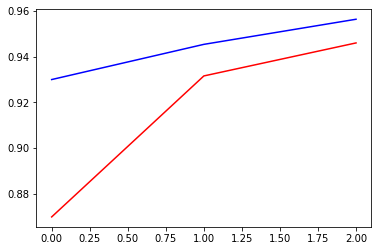

In [6]:
plt.plot(hist.history['acc'], color = 'red')
plt.plot(hist.history['val_acc'], color = 'blue')

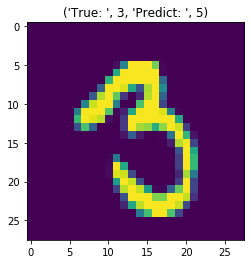

In [7]:
pred_y=np.argmax(model.predict(test_x),axis=1)
plot_miss(pred_y)

In [9]:
model.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                49400